In [0]:
#RNN For image classification
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GlobalMaxPool1D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
#Loading the MNIST Data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [18]:
#normializing MNIST Dataset
x_train,x_test=x_train/255.0,x_test/255.0

print(x_train.shape)

(60000, 28, 28)


In [19]:
#Building the model

i=Input(shape=x_train[0].shape)
x=LSTM(128, return_sequences=True)(i)
x=GlobalMaxPool1D()(x)
x=Dense(10, activation='softmax')(x)
model=Model(i,x)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2072 - accuracy: 0.9365 - val_loss: 0.1007 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0795 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0907 - val_accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0862 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0817 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9802 - val_loss: 0.0714 - val_accuracy:

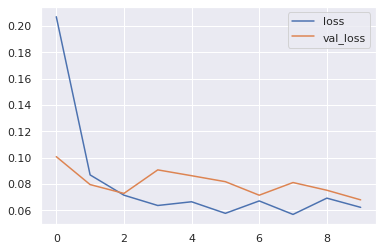

In [20]:
#Plotting loss per iternation
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


Confusion Matrix without normalization
[[ 968    0    0    1    1    1    1    1    7    0]
 [   0 1116    3    1    0    0    5    0   10    0]
 [   3    2 1009    4    1    0    1    4    7    1]
 [   0    0    4  993    0    4    0    2    5    2]
 [   0    1    0    0  956    0    3    2    4   16]
 [   1    1    1    6    0  868    2    1    5    7]
 [   2    2    0    0    4    1  942    0    7    0]
 [   0    7    6    1    3    0    0 1001    0   10]
 [   0    0    2    1    3    1    3    0  959    5]
 [   0    0    0    0    6    2    0    2   11  988]]


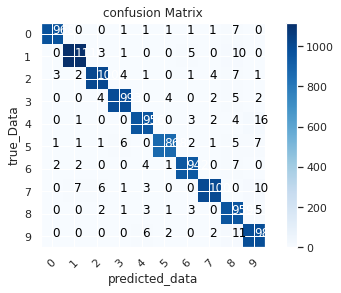

In [25]:
#Plotting confusion metrics and seeing where the model confused
def plot_confusion_matrix(cm,classes, Normalize=False, title='confusion Matrix', cmap=plt.cm.Blues):
  if Normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized Confusion Matrix: ')
  else:
    print('Confusion Matrix without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if Normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), color='white'if cm[i,j]>thresh else 'black')
    plt.tight_layout()
  plt.ylabel('true_Data')
  plt.xlabel('predicted_data')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))




Text(0.5, 1.0, 'True lable:  5 predicted_label : 3')

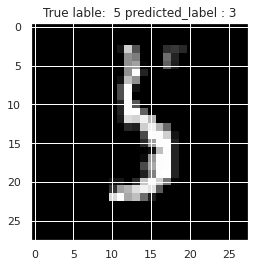

In [33]:
#Showing Misclassified example

misclassified_IDX=np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_IDX)
plt.imshow(x_test[i], cmap='gray')
plt.title('True lable:  {} predicted_label : {}'.format(y_test[i],p_test[i]))